<a href="https://colab.research.google.com/github/k-sidana-77/Parameter-Optimization-of-SVM/blob/main/Parameter_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import seaborn as sns

# Step 1: Load the dataset from local CSV
print("Loading dataset from local file...")
column_names = [
    'letter', 'x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar',
    'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege', 'yegvx'
]
df = pd.read_csv('letter-recognition.data', header=None, names=column_names)

X = df.iloc[:, 1:]  # Features
y = df.iloc[:, 0]   # Target labels

# Step 2: Generate 10 different samples
samples = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    samples.append((X_train, X_test, y_train, y_test))

# Step 3: Optimize SVM over 100 iterations per sample with only 'linear' and 'rbf' kernels
print("Optimizing SVM...")
best_results = []
convergence_data = []

for idx, (X_train, X_test, y_train, y_test) in enumerate(samples):
    best_acc = 0
    best_params = {}
    acc_per_iter = []

    for i in range(100):
        kernel = np.random.choice(['linear', 'rbf'])  # Limited to faster kernels
        C = np.random.uniform(0.1, 10)

        model = SVC(kernel=kernel, C=C)
        model.fit(X_train, y_train)
        acc = accuracy_score(y_test, model.predict(X_test))

        acc_per_iter.append(acc)
        if acc > best_acc:
            best_acc = acc
            best_params = {'kernel': kernel, 'C': round(C, 3)}

    best_results.append((f"S{idx + 1}", round(best_acc * 100, 2), best_params))
    convergence_data.append(acc_per_iter)




Table 1: Comparative performance of Optimized-SVM with different samples
Sample #  Best Accuracy           Best SVM Parameters
      S1          96.73 {'kernel': 'rbf', 'C': 9.942}
      S2          96.18 {'kernel': 'rbf', 'C': 9.664}
      S3          96.27 {'kernel': 'rbf', 'C': 9.679}
      S4          96.15 {'kernel': 'rbf', 'C': 9.942}
      S5          95.88 {'kernel': 'rbf', 'C': 9.932}
      S6          96.10  {'kernel': 'rbf', 'C': 9.77}
      S7          95.75 {'kernel': 'rbf', 'C': 9.784}
      S8          96.43 {'kernel': 'rbf', 'C': 8.759}
      S9          96.50 {'kernel': 'rbf', 'C': 9.562}
     S10          96.27 {'kernel': 'rbf', 'C': 9.471}


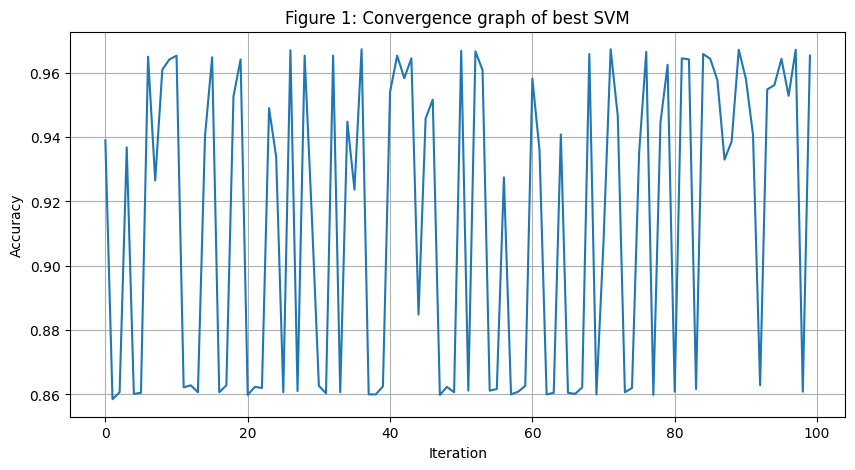


Data Analytics:


<Figure size 640x480 with 0 Axes>

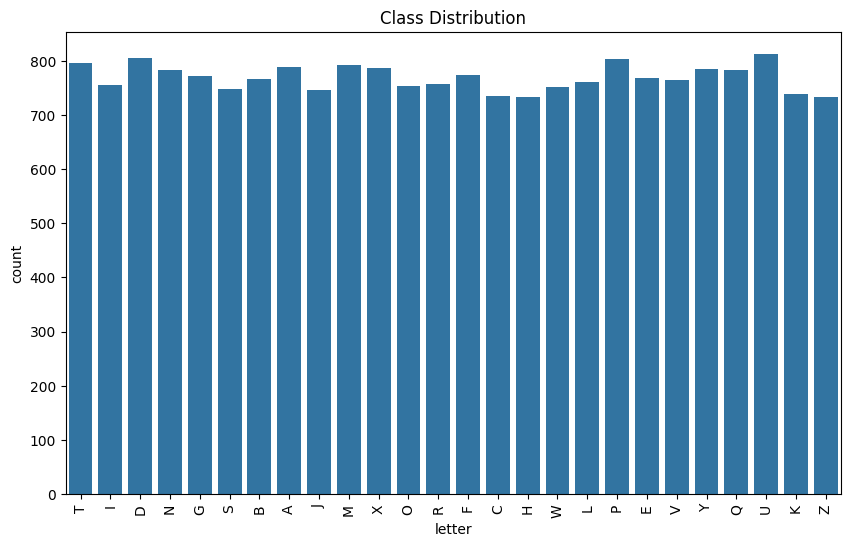

<Figure size 640x480 with 0 Axes>

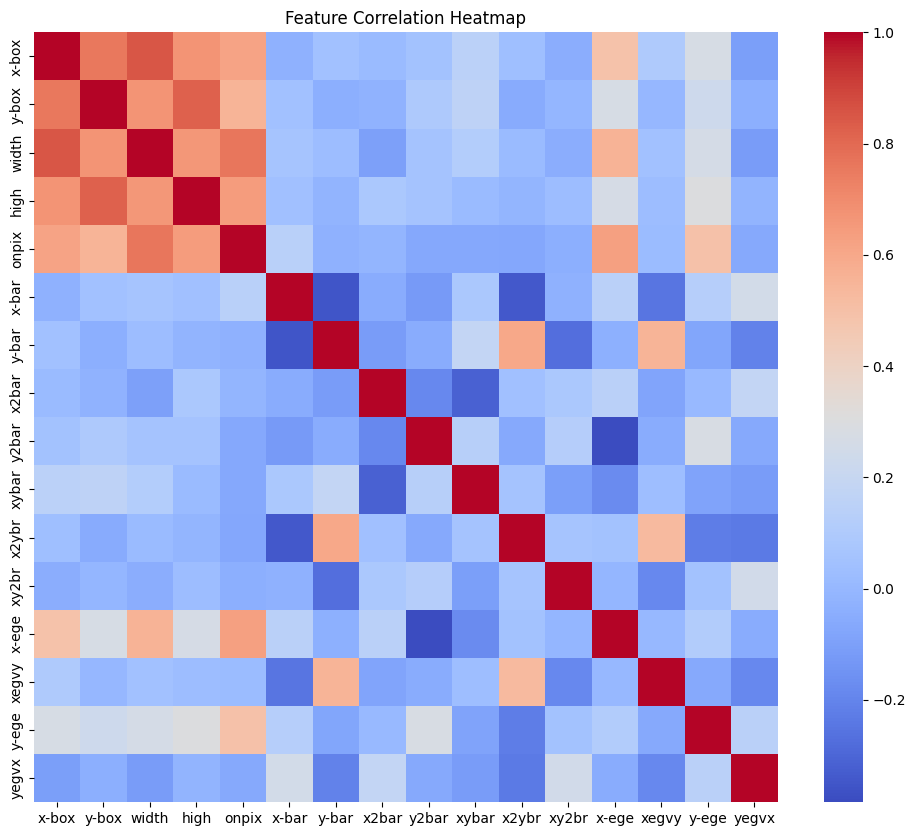

<Figure size 640x480 with 0 Axes>

In [5]:
# Step 4: Display the results table
results_df = pd.DataFrame(best_results, columns=['Sample #', 'Best Accuracy', 'Best SVM Parameters'])
print("\nTable 1: Comparative performance of Optimized-SVM with different samples")
print(results_df.to_string(index=False))
results_df.to_csv("svm_best_results.csv", index=False)


# Step 5: Plot convergence graph of best sample
best_idx = np.argmax([x[1] for x in best_results])
best_sample_data = convergence_data[best_idx]

plt.figure(figsize=(10, 5))
plt.plot(best_sample_data)
plt.title("Figure 1: Convergence graph of best SVM")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.grid()
plt.show()
plt.savefig("svm_convergence_graph.png")



# Step 6: Basic data analytics
print("\nData Analytics:")
plt.figure(figsize=(10, 6))
sns.countplot(x=y)
plt.title("Class Distribution")
plt.xticks(rotation=90)
plt.show()
plt.savefig("svm_class_distribution.png")

plt.figure(figsize=(12, 10))
sns.heatmap(X.corr(), annot=False, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()
plt.savefig("svm_feature_correlation.png")
